In [1]:
from Kernels.LumpedCapacitor import *
from Kernels.Helpers import *

### Plotting some materal properties based on temperature.

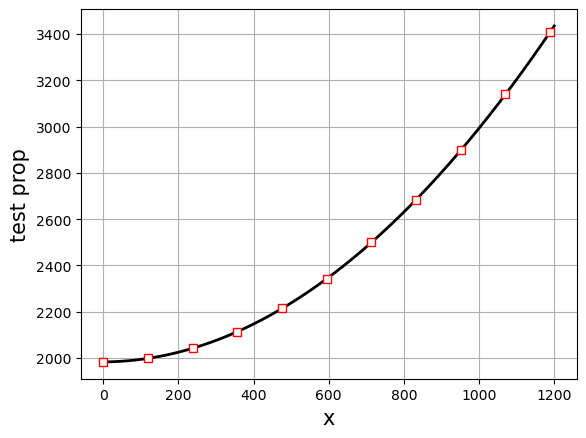

In [2]:
mat = LumpedMaterialProperty(name='test prop', function_coeffs=[1983, 0.01, 0.001])
mat.plot_prop(xMin=0, xMax=1200)

### Setting up a simple transient - no source, compared to actual solution

In [3]:
### Make a lumped capacitor
cp = LumpedMaterialProperty(name='specific heat', function_coeffs=[1983.0])
graphite = LumpedCapacitor(mass = 1, power = 0, h=1, A=1, L=1, C=cp, thermal_cond=1, initial_T=100,T_bulk=0, epsilon=1e-2)

the_times = np.linspace(0,5000, 1000)
the_dt = the_times[2] - the_times[1]
the_ts = np.array([])

for _ in the_times:
  graphite.solve(_dt = the_dt)
  graphite.update_old_to_most_recent()
  the_ts = np.append(the_ts, graphite.T)


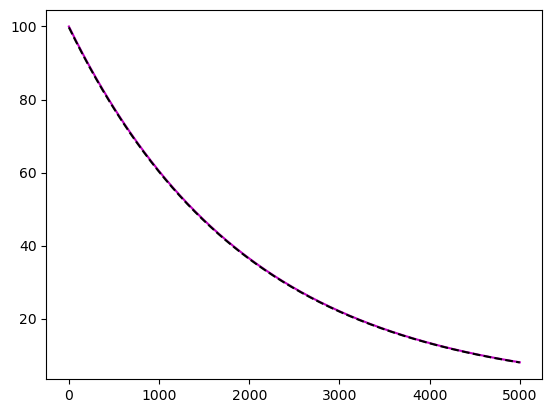

In [4]:
plt.plot(the_times, np.exp(-1.0/1983.0 * the_times)*100, 'm-')
plt.plot(the_times, the_ts, 'k--')


### Setup a simple case connecting to a real channel - each channel will have a thermal conductor attached to it.

In [5]:
import openmc
import numpy as np
from Meshing.Meshing import *
from Fields.Fields import *
from Kernels.Kernels import *
from Solvers.Solvers import *
from Subchannel.FluidRelation import FluidRelation
from Subchannel.Channel import Channel
from Subchannel.Channel import ChannelInterface
from Aux.CSVObjects import *
from Aux.ReactorPhysicsObjects import *

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.patches import Rectangle

import pandas as pd

from Data.msre_data import msre_data_dict

NOW RUNNING MSRE DATA USER INPUT
EXTENRAL TAU IS 7.017500000000002
Channel length L1 is 1.8148679046133467


LP AREA IS 0.27318354685967605
UP AREA IS 0.2803725875665097
DOWNCOMER AREA IS 0.09345752918883656
EXTERNAL LOOP AREA IS 0.5044909316020467


In [6]:
# FLUID
fluid = msre_data_dict['fluid']

### BC DATA ###
# mdot_csv = load_csv('Data/msre_flow_coastdown.csv')
mdot_bc = msre_data_dict['mdot_max']
T_bc = msre_data_dict['temp_bc']
pressure_bc = msre_data_dict['pressure_bc']

In [7]:
""" SETTING UP THE CHANNEL"""

### Get channel from pkl file
ch = Channel.import_from_pkl(filename='Data/model_1_channels/all_channels_homogenized.pkl')

### Setup the lumped capacitor for a channel:
cp = LumpedMaterialProperty(name='specific heat', function_coeffs=[1983.0])
graphite = LumpedCapacitor(mass = 1, power = 0, h=1, A=1, L=1, C=cp, thermal_cond=1, initial_T=100,T_bulk=0, epsilon=1e-2)

### Setup lumped capacitors.
ChannelConductionBuilder(channel=ch, conductor=graphite)